# Alguns estudos e implementações para amostragens Bootstrap

Ref: Estatistica na prática para cientistia de dados:  
- O bootstrap se tornou o modo padrão de estimar o erro-padrão; 

**O erro padrão:**  
É uma métrica única que resume a variabilidade na distribuição de amostragem para uma estatística.

O algoritmo para uma reamostragem bootstrap da média é o seguinte, para uma amostra de tamanho n: 
- 1. Extraia um valor de amostra, registre, reponha.  
- 2. Repita n vezes.  
- 3. Registre a média dos n valores reamostrados.  
- 4. Repita os passos de 1 a 3 R vezes.  
- 5. Use os resultados R para:  
    - Calcular seu desvio padrão  
    - Produza um histograma ou boxplot.  
    - encontre um intervalo de confiança.

## Sobre os dados de referencia: 

Os dados utilizados para esses estudos são referentes a um dataset retirado do kaggle: [source](https://www.kaggle.com/datasets/erdemtaha/cancer-data), há 32 coluna. Iremos utilizar para esse caso de estudo as  variáveis `radius_mean` e também `concavit_mean`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Configurando o estilo dos gráficos
plt.style.use('bmh')

In [2]:
# Carrega o dataset
data = pd.read_csv('data/cancer_data.csv')

In [3]:
radius_mean = data.radius_mean
concavit_mean = data.concavity_mean

In [4]:
print(radius_mean.info())
print(concavit_mean.info())

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: radius_mean
Non-Null Count  Dtype  
--------------  -----  
569 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: concavity_mean
Non-Null Count  Dtype  
--------------  -----  
569 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB
None


### Resumos estatisticos e histogramas das amostras originais

In [5]:
# amostra original
radius_mean.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

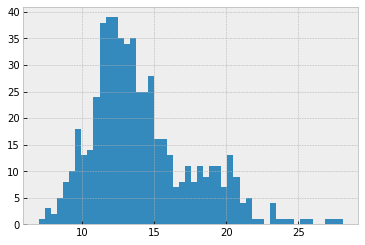

In [6]:
plt.hist(radius_mean, bins=50)
plt.show()

In [7]:
# Amostra original 
concavit_mean.describe()

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64

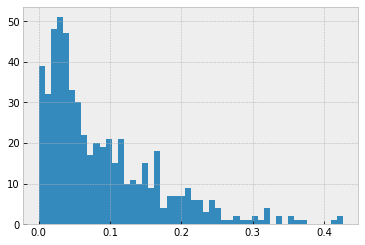

In [8]:
plt.hist(concavit_mean, bins=50)
plt.show()

## Implementando uma função para o bootstrap

In [9]:
class Bootstrap:
    """
    A class for performing bootstrap resampling on a given dataset and generating histograms of the distribution of means.

    Args:
        amostra (pandas.Series): A pandas Series object containing the data to be resampled.
        n (int): The sample size for each bootstrap resample. Default is 10.
        R (int): The number of bootstrap resamples to generate. Default is 10.

    Attributes:
        amostra (pandas.Series): The input data to be resampled.
        n (int): The sample size for each bootstrap resample.
        R (int): The number of bootstrap resamples to generate.

    Methods:
        bootstrap(): Generates bootstrap resamples and returns the mean and standard deviation of the distribution of means.
        plot_hist_mean(bins=10): Generates a histogram of the distribution of means for the bootstrap resamples.
                                 Optional argument 'bins' specifies the number of bins to use in the histogram.
    """
    def __init__(self, sample, n=10, R=10):
        """
        Constructs a new Bootstrap object.

        Args:
            amostra (pandas.Series): A pandas Series object containing the data to be resampled.
            n (int): The sample size for each bootstrap resample. Default is 10.
            R (int): The number of bootstrap resamples to generate. Default is 10.
        """
        self.sample = sample
        self.n = n
        self.R = R
    
    def bootstrap(self):
        """
        Generates bootstrap resamples and returns the mean and standard deviation of the distribution of means.

        Returns:
            tuple: A tuple containing the mean and standard deviation of the distribution of means for the bootstrap resamples.
        """
        mean_boot_values = [self.sample.sample(self.n, replace=True).mean() for x in range(self.R)]
        std_boot_values = [self.sample.sample(self.n, replace=True).std() for x in range(self.R)]
        return np.mean(mean_boot_values), np.std(std_boot_values)
    
    def plot_hist_mean(self, bins=10):
        """
        Generates a histogram of the distribution of means for the bootstrap resamples.

        Args:
            bins (int): The number of bins to use in the histogram. Default is 10.
        """
        df = [self.sample.sample(self.n, replace=True).mean() for x in range(self.R)]
        plt.hist(df, bins=bins)
        plt.title('Histogram to distribuition values')
        plt.ylabel('Frequency')
        plt.xlabel(self.sample.name)
        plt.show()

In [10]:
# Dados radius_mean: 
boot_10 = Bootstrap(radius_mean,50,10)
boot_100 = Bootstrap(radius_mean,50,100)
boot_500 = Bootstrap(radius_mean,50,500)
boot_1000 = Bootstrap(radius_mean,50,1000)
boot_10000 = Bootstrap(radius_mean,50,10000)

In [11]:
# Dados concavit_mean:
concavit_10 = Bootstrap(concavit_mean,50,10)
concavit_100 = Bootstrap(concavit_mean,50,100)
concavit_500 = Bootstrap(concavit_mean,50,500)
concavit_1000 = Bootstrap(concavit_mean,50,1000)
concavit_10000 = Bootstrap(concavit_mean,50,10000)

### Diferentes plots radius_mean para R =  100, 500, 1000 e 10000

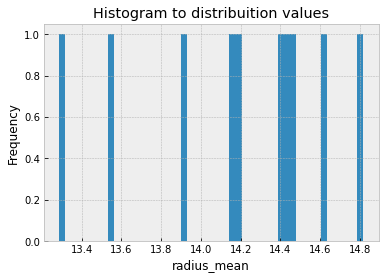

In [12]:
# n=50 e R=10
boot_10.plot_hist_mean(bins=50)

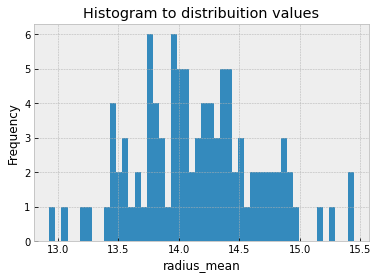

In [13]:
# n=50 e R=100
boot_100.plot_hist_mean(bins=50)

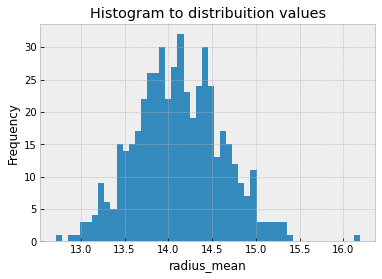

In [14]:
# n=50 e R=500
boot_500.plot_hist_mean(bins=50)

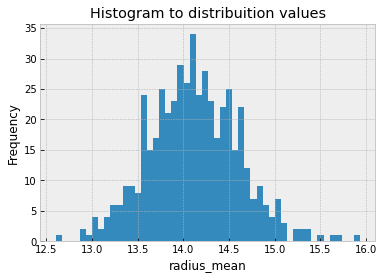

In [15]:
# n=50 e R=1000
boot_500.plot_hist_mean(bins=50)

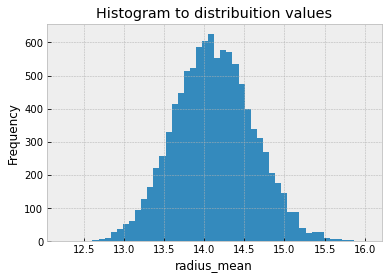

In [16]:
# n=50 e R=10000
boot_10000.plot_hist_mean(bins=50)

## Diferentes plot concavit_mean para R=10, 100, 500, 1000, 10000

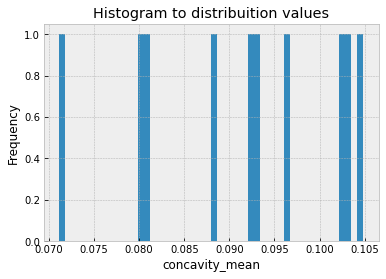

In [17]:
# n=50 e R=10
concavit_10.plot_hist_mean(bins=50)

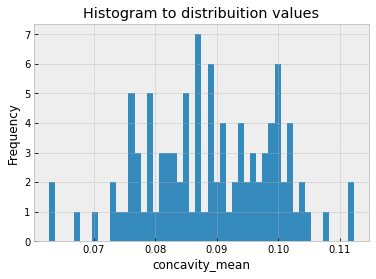

In [18]:
# n=50 e R=100
concavit_100.plot_hist_mean(bins=50)

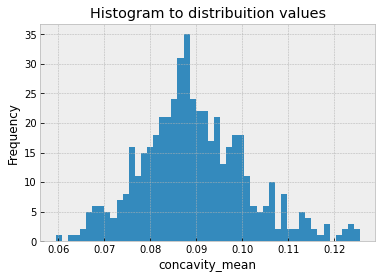

In [19]:
# n=50 e R=500
concavit_500.plot_hist_mean(bins=50)

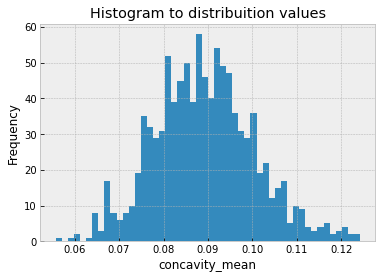

In [20]:
# n=50 e R=1000
concavit_1000.plot_hist_mean(bins=50)

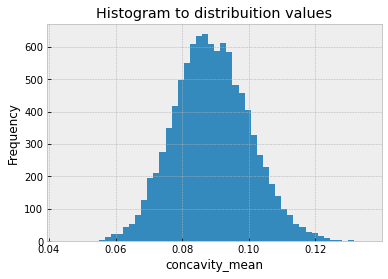

In [21]:
# n=50 e R=10000
concavit_10000.plot_hist_mean(bins=50)

**O boostrap não compensa pequenos tamanhos de amostra. Ele não cria novos dados nem preenche buracos em um conjunto de dados existente. Ele meramente nos informa sobre como diversas amostras adicionais se comportariam ao serem extraídas de uma população como amostra original.**

O bootstrap é uma ferramenta geral que pode ser usada para gerar intervalos de confiança para a maioria das estatísticas ou parâmetros de modelos.

## Intervalos de confiança

Tabelas de frequencia, histogramas, boxplots e erros-padrão são todos meios de entender o potencial erro de uma estimativa de amostra. Intervalos de confiança são outro.

Um jeito de pensar sobre um intervalo de confiança de 90% é o seguinte: é o intervalo que abrange os 90% centrais da distribuição de amostragem de uma estatística amostral.